In [1]:
# Libraries
import pandas as pd
import os
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [21]:
# Loading data
# Chikkaballapur: 13°25'43.0"N 77°44'02.9"E
# Raichur: xxx N, xxx E, tba

# Setting directory
# My script is in my working directory already, but adjust if needed
os.chdir("C:/Users/48512/Desktop/Climate Studies/Period 5 and 6/Design of climate change mitigation and adaptation strategies/Data")

# Readding data
t_max_chik = pd.read_csv('dataimd/tmax_13.25_77.44.csv', delimiter=",")
t_max_raich = pd.read_csv('dataimd/tmax_16.50_76.75.csv', delimiter=",")

In [23]:
t_max_chik 

,DateTime,13.25 77.44
0,1951-01-01,26.9700
1,1951-01-02,26.1800
2,1951-01-03,26.3100
3,1951-01-04,26.7300
4,1951-01-05,26.9300
...,...,...
27024,2024-12-27,25.4639
27025,2024-12-28,27.9013
27026,2024-12-29,28.4851
27027,2024-12-30,27.4198


In [25]:
t_max_chik 

,DateTime,13.25 77.44
0,1951-01-01,26.9700
1,1951-01-02,26.1800
2,1951-01-03,26.3100
3,1951-01-04,26.7300
4,1951-01-05,26.9300
...,...,...
27024,2024-12-27,25.4639
27025,2024-12-28,27.9013
27026,2024-12-29,28.4851
27027,2024-12-30,27.4198


In [27]:
# Cleaning up the data. Setting a date time index, that is in the correct date time format (originally the format is object)
# It makes it easier to slice the data to for example yearly and monthly values

# For Chikkaballapur
t_max_chik["date_time"] = pd.to_datetime(t_max_chik["DateTime"])

# Set date_time as the index
t_max_chik.set_index("date_time", inplace=True)

del t_max_chik['DateTime']

# For Raichur
t_max_raich["date_time"] = pd.to_datetime(t_max_raich["DateTime"])

# Set date_time as the index
t_max_raich.set_index("date_time", inplace=True)

del t_max_raich['DateTime']

In [29]:
# Setting a threshold for determining a hot day. 40*C for Raich and 36*C for Chik?
# Calculate the xth percentile in the first x years 
# defining the function to set a treshold here

def get_percentile(df, years, percentile, column_index=0): 
    
    # Get the start and end date
    start_date = df.index.min()
    end_date = start_date + pd.DateOffset(years=years)
    
    # Filter the data
    df_subset = df.loc[start_date:end_date]
    
    # Select the column by index
    data_column = df_subset.iloc[:, column_index]
    
    # Calculate the percentile
    threshold = data_column.quantile(percentile)
    
    print(f"{int(percentile*100)}th percentile over first {years} years ({start_date.date()} to {end_date.date()}): {threshold:.2f}")
    return threshold


In [55]:
####### Place for settings
# Treshold settings
first_years = 20 # how many first years to set the treshold,
percentile_value = 0.965 # what percentile, if top 10% of highest values then 0.9 and so on

In [61]:
df = t_max_raich # Adjustable to wchich dataframe we want to analyse
treshold_raich = round(get_percentile(df, years=first_years, percentile=percentile_value) , 2) # Rounding to 0 decimal places of temperature

96th percentile over first 20 years (1951-01-01 to 1971-01-01): 40.01


In [59]:
df = t_max_chik
treshold_chik = round(get_percentile(df, years=first_years, percentile=percentile_value ) ,2) # Rounding to 2 decimal places of temperature

96th percentile over first 20 years (1951-01-01 to 1971-01-01): 35.21


In [63]:
# Now I want to count the number of days avove a certain treshold in both regions
# Defining a function that calculates the no of days above tresh

def count_hot_days_per_year(df, threshold, column_index=0):
    # Ensure datetime index
    df.index = pd.to_datetime(df.index)
    
    # Select the relevant column by index
    temp_series = df.iloc[:, column_index]
    
    # Filter for days above threshold
    hot_days = temp_series[temp_series > threshold]
    
    # Group by year and count
    hot_days_per_year = hot_days.groupby(hot_days.index.year).count()
    
    return hot_days_per_year

In [65]:
# Calculation for Raichur
hot_day_counts_raich = count_hot_days_per_year(t_max_raich, treshold_raich)

In [67]:
hot_day_counts_raich

date_time
1951    12
1952    17
1955     1
1956    12
1957    12
        ..
2020    20
2021     2
2022    16
2023    13
2024    27
Name: 16.5 76.75, Length: 72, dtype: int64

In [69]:
# Calculating for Chikkaballapur
hot_day_counts_chik = count_hot_days_per_year(t_max_chik, treshold_chik)

In [81]:
# defining a function for plotting the no. of hot days in one location and a trend line
def plot_hot_days_with_trend(hot_day_counts, threshold, location):
    # Convert index and values to numpy arrays
    years = hot_day_counts.index.values
    counts = hot_day_counts.values

    # Fit a linear trend line
    z = np.polyfit(years, counts, 1)  # 1 = linear
    p = np.poly1d(z)  # Create a polynomial object

    # Plot bar chart
    plt.figure(figsize=(12, 5))
    plt.bar(years, counts, color='skyblue', label='Hot Days')

    # Plot trend line
    plt.plot(years, p(years), color='red', linewidth=2, label='Trend line')

    # Add equation text
    equation = f'y = {z[0]:.2f}x + {z[1]:.2f}'
    plt.text(years.min(), 2, equation, fontsize=12, color='red')

    # Labels and title
    plt.title(f'Days above {threshold:.0f}°C per year in {location}')
    plt.xlabel('Year')
    plt.ylabel('Number of Hot Days')
    plt.legend()
    plt.tight_layout()
    plt.show()

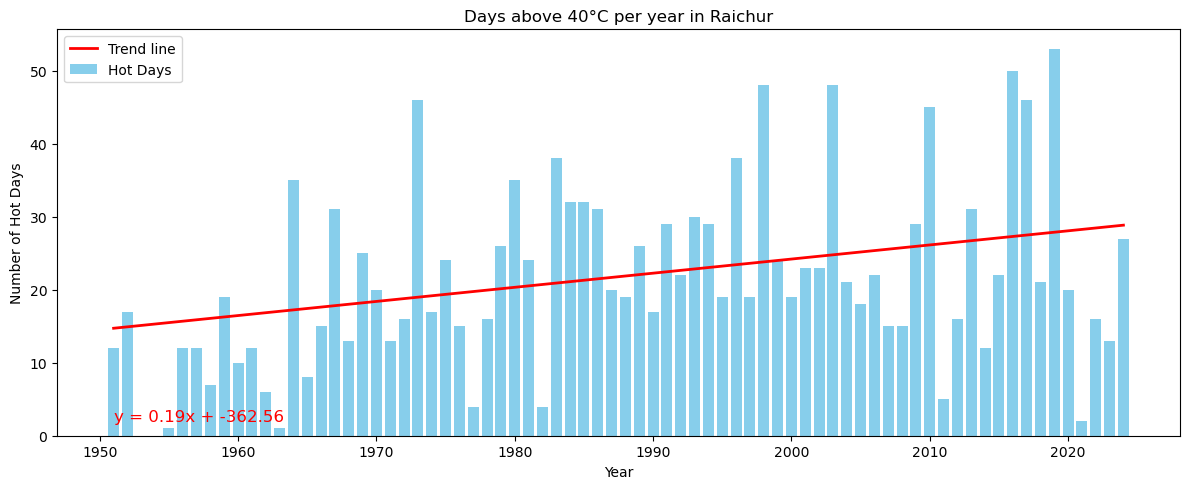

In [83]:
# Plotting for Raichur
plot_hot_days_with_trend(hot_day_counts_raich, treshold_raich, location='Raichur')

### 5 year average would be nice to check

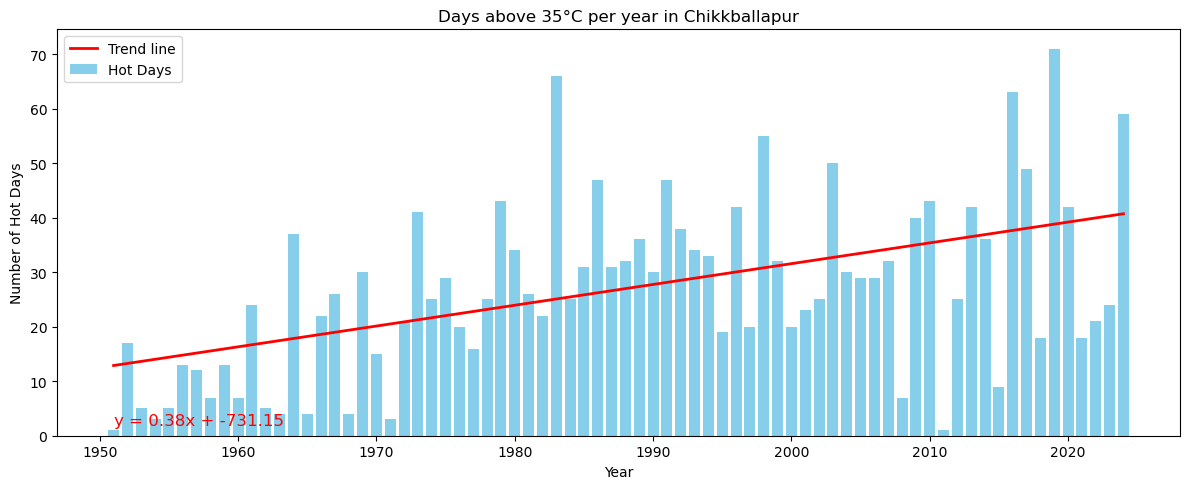

In [85]:
# Plotting for Chikkaballapur
plot_hot_days_with_trend(hot_day_counts_chik, treshold_chik, location = "Chikkballapur")

In [192]:
pd.set_option('display.max_rows', None)

In [87]:
# At what time of the year the first hot day usually occurs?
# Defining a function to calculate the first hot day in each location
def first_hot_day_each_year(df, threshold, column_index=0):
    # Ensure datetime index
    df.index = pd.to_datetime(df.index)

    # Select the temperature column by index
    temp_series = df.iloc[:, column_index]

    # Create a DataFrame to hold results
    first_hot_days = []

    # Group by year
    for year, group in temp_series.groupby(temp_series.index.year):
        # Filter for hot days
        hot_days = group[group > threshold]
        if not hot_days.empty:
            # Get the first occurrence
            first_day = hot_days.index.min()
            # Get day-of-year for comparison across years
            day_of_year = first_day.dayofyear
            first_hot_days.append({'year': year, 'date': first_day, 'day_of_year': day_of_year})
        else:
            # Optional: handle years with no hot days
            first_hot_days.append({'year': year, 'date': None, 'day_of_year': None})

    
# Convert to DataFrame
    result_df = pd.DataFrame(first_hot_days)
    return result_df

In [91]:
# Caclulating the first hot day every years in Raichur
first_hot_day_raich = first_hot_day_each_year(t_max_raich, treshold_raich)
first_hot_day_raich 

,year,date,day_of_year
0,1951,1951-05-09,129.0
1,1952,1952-04-30,121.0
2,1953,NaT,NaN
3,1954,NaT,NaN
4,1955,1955-05-10,130.0
...,...,...,...
69,2020,2020-04-14,105.0
70,2021,2021-03-31,90.0
71,2022,2022-03-29,88.0
72,2023,2023-04-13,103.0


In [93]:
# Caclulating the first hot day every years in Chikkaballapur
first_hot_day_chik = first_hot_day_each_year(t_max_chik, treshold_chik)
first_hot_day_chik

,year,date,day_of_year
0,1951,1951-03-22,81
1,1952,1952-04-23,114
2,1953,1953-03-20,79
3,1954,1954-04-19,109
4,1955,1955-04-01,91
...,...,...,...
69,2020,2020-03-19,79
70,2021,2021-03-26,85
71,2022,2022-03-16,75
72,2023,2023-03-28,87


In [142]:
np.polyfit??

Signature:       np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
Call signature:  np.polyfit(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function polyfit at 0x000001CC8AAFF4C0>
File:            c:\users\48512\anaconda3\lib\site-packages\numpy\lib\polynomial.py
Source:         
@array_function_dispatch(_polyfit_dispatcher)
def polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False):
    """
    Least squares polynomial fit.

    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.

    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.

    The `Polynomial.fi

In [99]:
def plot_first_hot_day(first_hot_df, threshold, location):

    # Filter out rows with NaN values (years with no hot day)
    plot_df = first_hot_df.dropna(subset=['day_of_year'])

    # Extract x (year) and y (day of year)
    x = plot_df['year'].values
    y = plot_df['day_of_year'].values

    # Fit a linear trend line
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    trend = p(x)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(plot_df['year'], plot_df['day_of_year'], marker='o')
    plt.plot(x, trend, color='red', linewidth=2, label='Trend Line')
    #plt.gca().invert_yaxis()  # Earlier days = higher temps, so invert for effect

    # Equation text
    # Works only for the 1st degree polynomial
    # equation = f'Day = {z[0]:.2f} × Year + {z[1]:.2f}'
    # plt.text(x.min(), max(y) * 0.8, equation, fontsize=11, color='red')

    # Title and labels
    
    plt.title(f"First Day >{threshold:.0f}°C Each Year in {location}")
    plt.xlabel("Year")
    plt.ylabel("Day of Year (1 = Jan 1)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

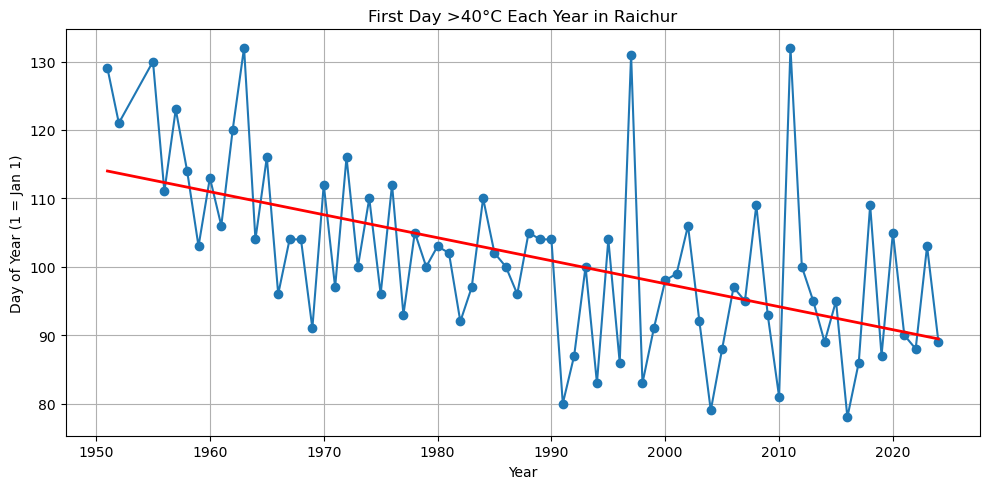

In [101]:
# Plotting the first hot day every years in Raichur
plot_first_hot_day(first_hot_day_raich, treshold_raich, location = "Raichur")

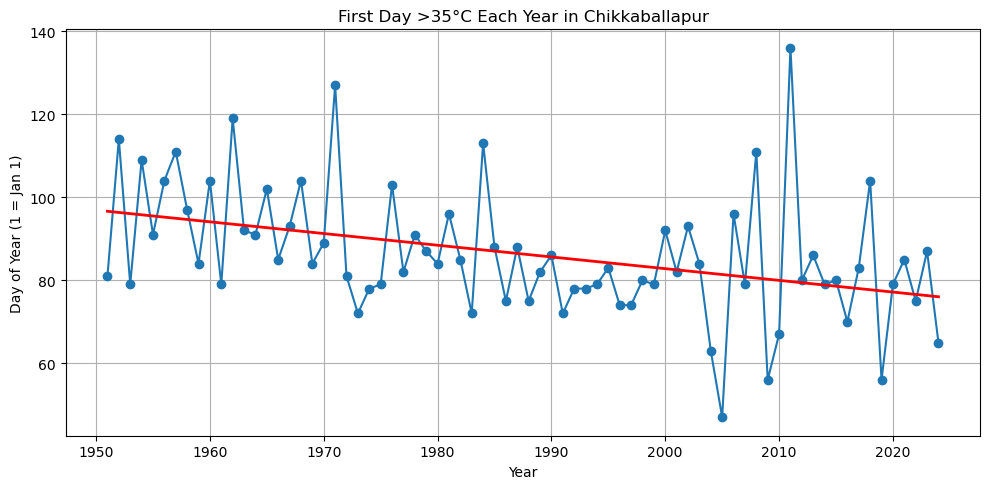

In [103]:
# PLotting the first hot day every years in Chikkaballapur
plot_first_hot_day(first_hot_day_chik, treshold_chik, location = "Chikkaballapur")